# Task # 2 - To Explore Supervised Machine Learning

**Problem Statment :**
 In this regression task we will predict the percentage of
marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**Note :** Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a day ?

**Auther : SHUBHAM G GAJBHIYE**


In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
% matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read train data
path = '/content/drive/My Drive/Assingment/'
data = pd.read_csv(os.path.join(path,'student_score.csv'))

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Note : Here Hours is independent variable and Scores are dependent variable (I.e. Target Variable)

Lets do some EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


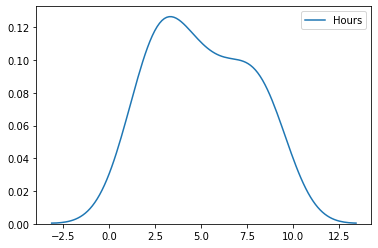

In [ ]:
sb.kdeplot(data.Hours)

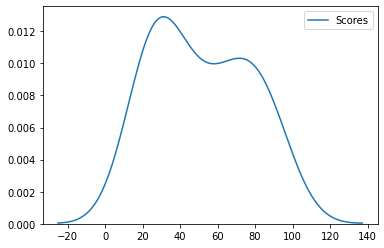

In [ ]:
sb.kdeplot(data.Scores)

(array([1., 0., 1., 0., 1., 0., 0., 0., 2., 2., 0., 0., 1., 1., 1., 0., 1.,
        0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.]),
 array([1.1  , 1.262, 1.424, 1.586, 1.748, 1.91 , 2.072, 2.234, 2.396,
        2.558, 2.72 , 2.882, 3.044, 3.206, 3.368, 3.53 , 3.692, 3.854,
        4.016, 4.178, 4.34 , 4.502, 4.664, 4.826, 4.988, 5.15 , 5.312,
        5.474, 5.636, 5.798, 5.96 , 6.122, 6.284, 6.446, 6.608, 6.77 ,
        6.932, 7.094, 7.256, 7.418, 7.58 , 7.742, 7.904, 8.066, 8.228,
        8.39 , 8.552, 8.714, 8.876, 9.038, 9.2  ]),
 <a list of 50 Patch objects>)

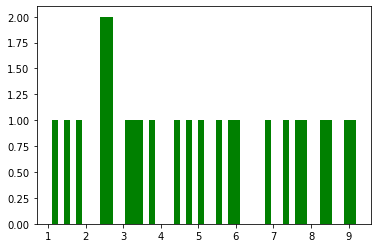

In [ ]:
plt.hist(data.Hours,bins = 50,color='g')

(array([1., 1., 1., 0., 1., 1., 1., 0., 3., 0., 0., 1., 0., 0., 0., 1., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 0., 0., 2., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.]),
 array([17.  , 18.56, 20.12, 21.68, 23.24, 24.8 , 26.36, 27.92, 29.48,
        31.04, 32.6 , 34.16, 35.72, 37.28, 38.84, 40.4 , 41.96, 43.52,
        45.08, 46.64, 48.2 , 49.76, 51.32, 52.88, 54.44, 56.  , 57.56,
        59.12, 60.68, 62.24, 63.8 , 65.36, 66.92, 68.48, 70.04, 71.6 ,
        73.16, 74.72, 76.28, 77.84, 79.4 , 80.96, 82.52, 84.08, 85.64,
        87.2 , 88.76, 90.32, 91.88, 93.44, 95.  ]),
 <a list of 50 Patch objects>)

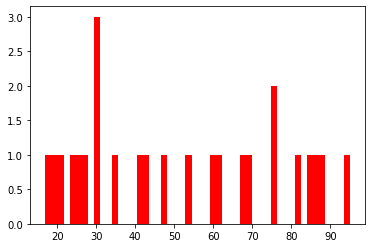

In [ ]:
plt.hist(data.Scores,bins=50,color='r')

Note : 
*  By doing basic eda we can conclude that there are no missing values 
*  Data variable follows Normal Distribution 
 






Lets separate dependent and independent variables

In [ ]:
x , y = data.Hours.values.reshape(-1,1) , data.Scores.values.reshape(-1,1)

In [ ]:
x_train, y_train , x_valid , y_valid = train_test_split(x,y)

Lets build the linear model and try to fit the training dataset

In [ ]:
linear = LinearRegression()
linear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# lets check interception points
print(f"Intercept : {linear.intercept_} \n Coefficent : {linear.coef_}")

Intercept : [2.48367341] 
 Coefficent : [[9.77580339]]


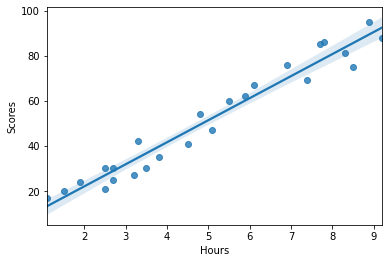

In [ ]:
# plotting data points the regression line fitting process
sb.regplot(data.Hours,data.Scores)

Evaluting the model using mse and rmse on validation dataset

In [ ]:
# lets check error on validtion data
print(f"Mean Square Error : {mean_squared_error(y_valid,linear.predict(y_valid))}")
print(f"Root Mean Square Error : {math.sqrt(mean_squared_error(y_valid,linear.predict(y_valid)))}")

Mean Square Error : 177713.77418557086
Root Mean Square Error : 421.56111559959


let's do some prediction

In [ ]:
def Score_Prediction(x_test,linear):
  try :
    pred = linear.predict(x_test)
  except :
    pred = linear.predict(np.array(x_test).reshape(1,-1))
  finally:
    print(f"Student score will be {pred} if he/she study {x_test}hr/day")



In [ ]:
x_test = float(input("Enter Student daily study hours : "))
Score_Prediction(x_test,linear) # Please provide input in the form of 2d array

Enter Student daily study hours : 9.25
Student score will be [[92.90985477]] if he/she study 9.25hr/day


In [ ]:
# or you can calculate the score using intercept and coeff of linear model
score = linear.intercept_ + linear.coef_ * x_test
print(f"Student score will be {score} if he/she study for {x_test} hr/day")

Student score will be [[92.90985477]] if he/she study for 9.25 hr/day


> End Notes : We have successfully build the Linear Regression Model using scikit learn and also performed some predition. 

